In [1]:
import pandas as pd

ham_df = pd.read_csv('./datasets/ham_.csv')
phishing_df = pd.read_csv('./datasets/phishing_.csv')
df = ham_df + phishing_df

In [ ]:
# for col in ham_df.columns:
#     print(col, ham_df[col].unique())
# print()
# for col in phishing_df.columns:
#     print(col, phishing_df[col].unique())

In [3]:
df = pd.concat([phishing_df,ham_df],axis=0)

In [4]:
del df['Unnamed: 0']
del df['Html iFrame']
del df['HTML content']

#### Data encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if set(df[col].unique()).issubset({True,False}):
        df[col] = LabelEncoder().fit_transform(df[col])

In [6]:
del df['Encoding']

In [8]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(MinMaxScaler().fit_transform(df),columns=df.columns)


In [9]:
df

,Html Form,Attachments,Flash content,URLs,External Resources,Javascript,Css,IPs in URLs,@ in URLs,Phishy
0,0.0,0.0,0.0,0.055300,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.004608,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.004608,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.004608,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.078341,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
21401,0.0,0.0,0.0,0.002304,0.0,0.0,0.0,0.0,0.0,0.0
21402,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
21403,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
21404,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], stratify=df.iloc[:,-1], test_size=0.3, random_state=42)

In [11]:
import numpy as np

print(np.bincount(y_train))
print(np.bincount(y_test))

[7493 7491]
[3212 3210]


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.660853316723762


In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.9062597321706634


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)


Accuracy: 0.6705076300218


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy2)


Accuracy: 0.9062597321706634


In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy3)


Accuracy: 0.9062597321706634


In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy)


Accuracy: 0.6958891311118032


In [38]:
from xgboost import XGBClassifier

xgbm = XGBClassifier()
xgbm.fit(X_train,y_train)
y_pred_xgbm = xgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgbm)
print("Accuracy:", accuracy)

Accuracy: 0.9062597321706634


In [55]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", accuracy)

Accuracy: 0.9062597321706634


c:\Users\Djamel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
models_predictions = {
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn,
    'Naive Bayes': y_pred_nb,
    'XGBoost': y_pred_xgbm,
    'Logistic Regression': y_pred_logreg,
    'MLPClassifier': y_pred_mlp
}


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, accuracy_score


In [54]:
for name, y_pred in models_predictions.items():
    print(name,end = ' ')
    print(accuracy_score(y_test, y_pred))

Decision Tree 0.9062597321706634
Random Forest 0.9062597321706634
KNN 0.9062597321706634
Naive Bayes 0.660853316723762
XGBoost 0.9062597321706634
Logistic Regression 0.6958891311118032
MLPClassifier 0.9062597321706634


In [ ]:

for name, y_pred in models_predictions.items():
    print(name)
    print(classification_report(y_test, y_pred))

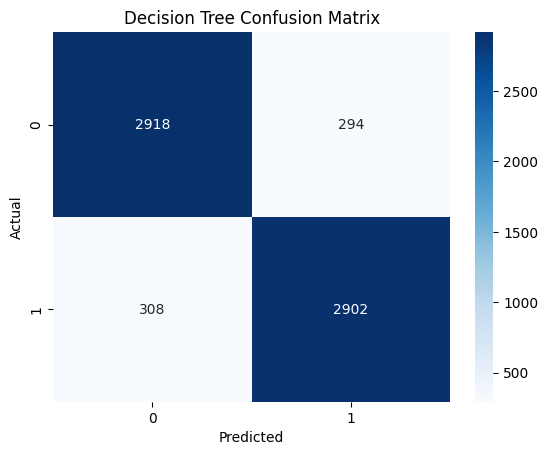

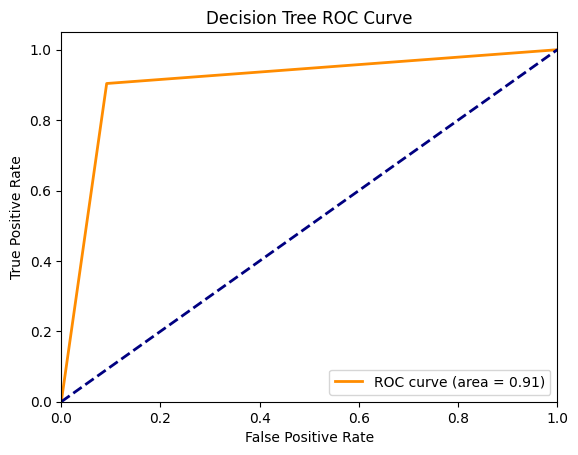

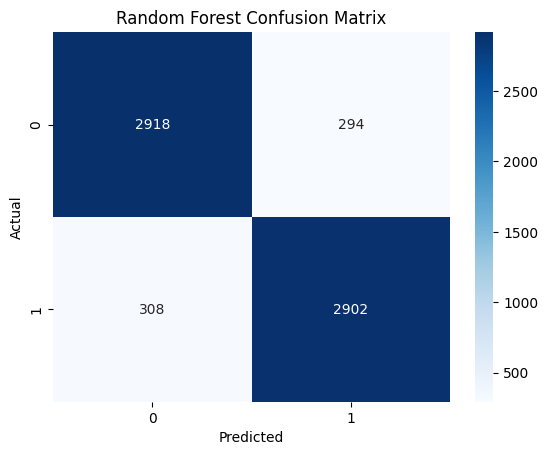

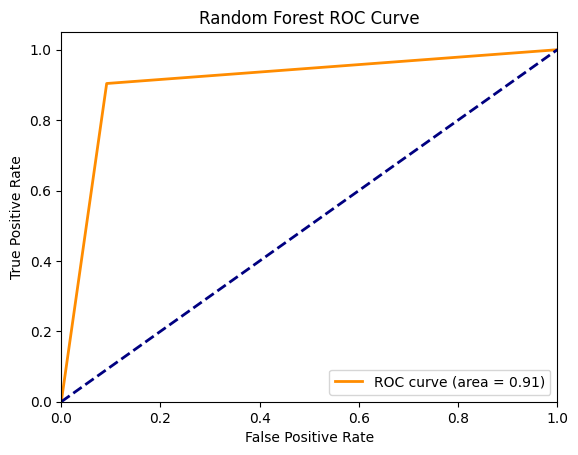

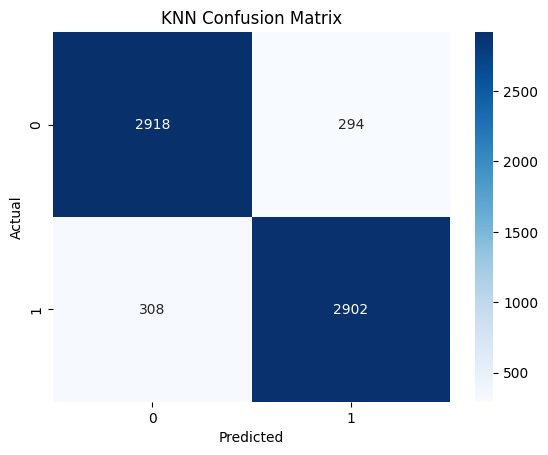

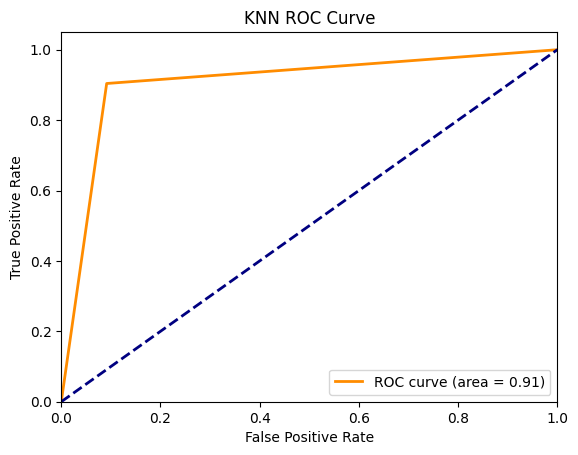

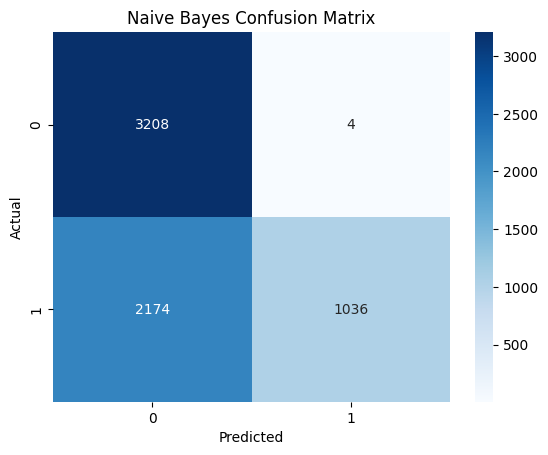

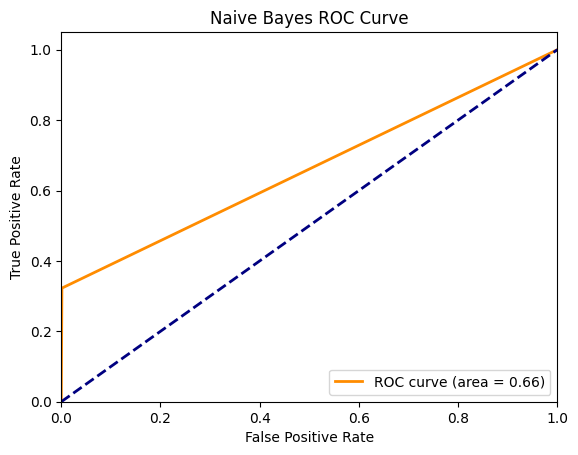

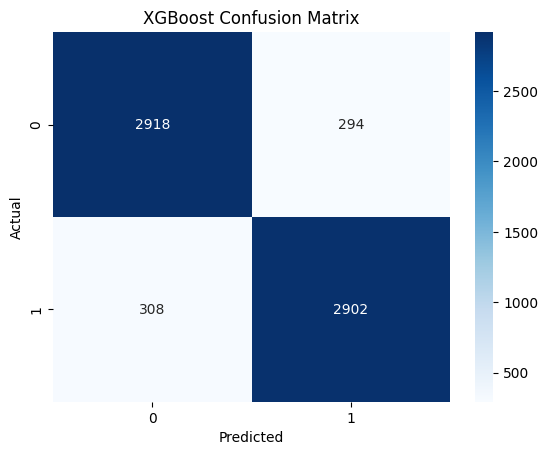

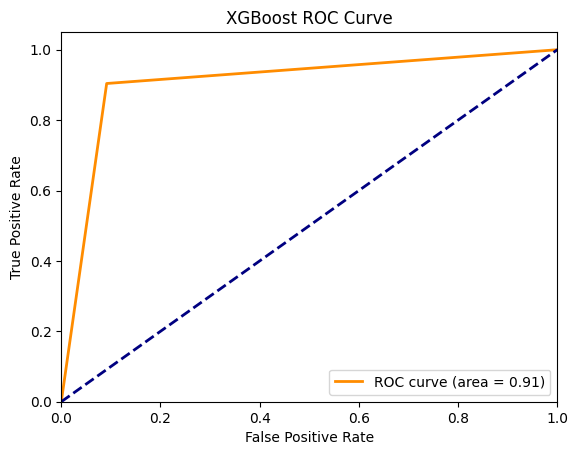

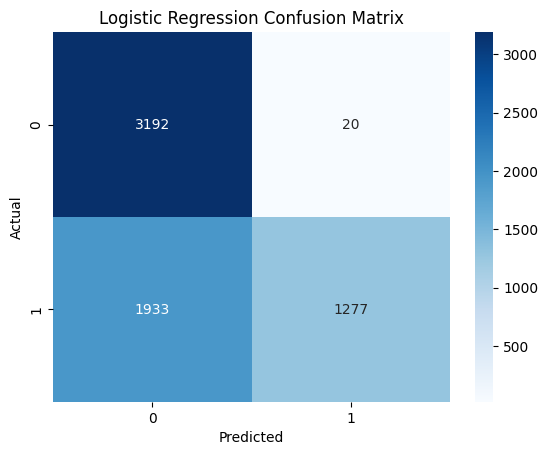

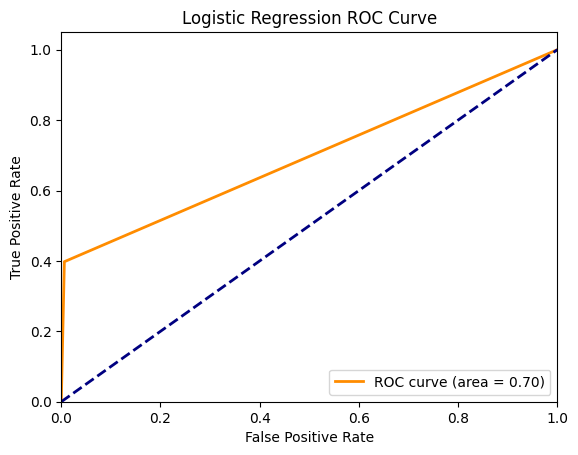

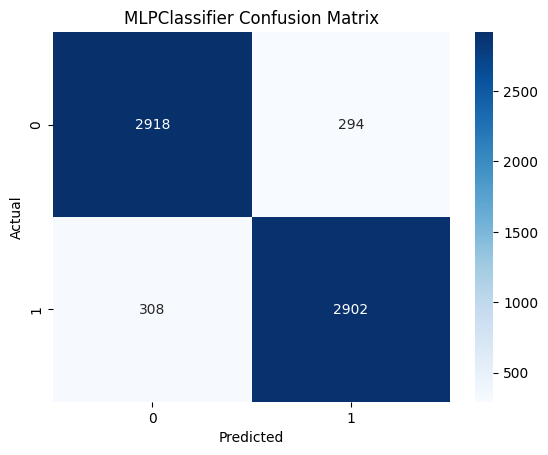

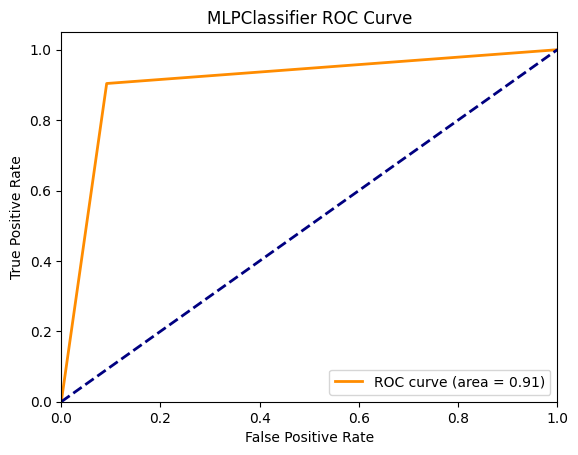

In [63]:
for name, y_pred in models_predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()